# Phase 1 Project Submission

* Student name: Connor Anastasio
* Student pace: self paced (part time)
* Scheduled project review date/time: 05/08/2024 @ 11:00am
* Instructor name: Morgan Jones
* Blog post URL: https://dev.to/connoranastasio/a-history-of-computing-what-led-up-to-ai-4ond


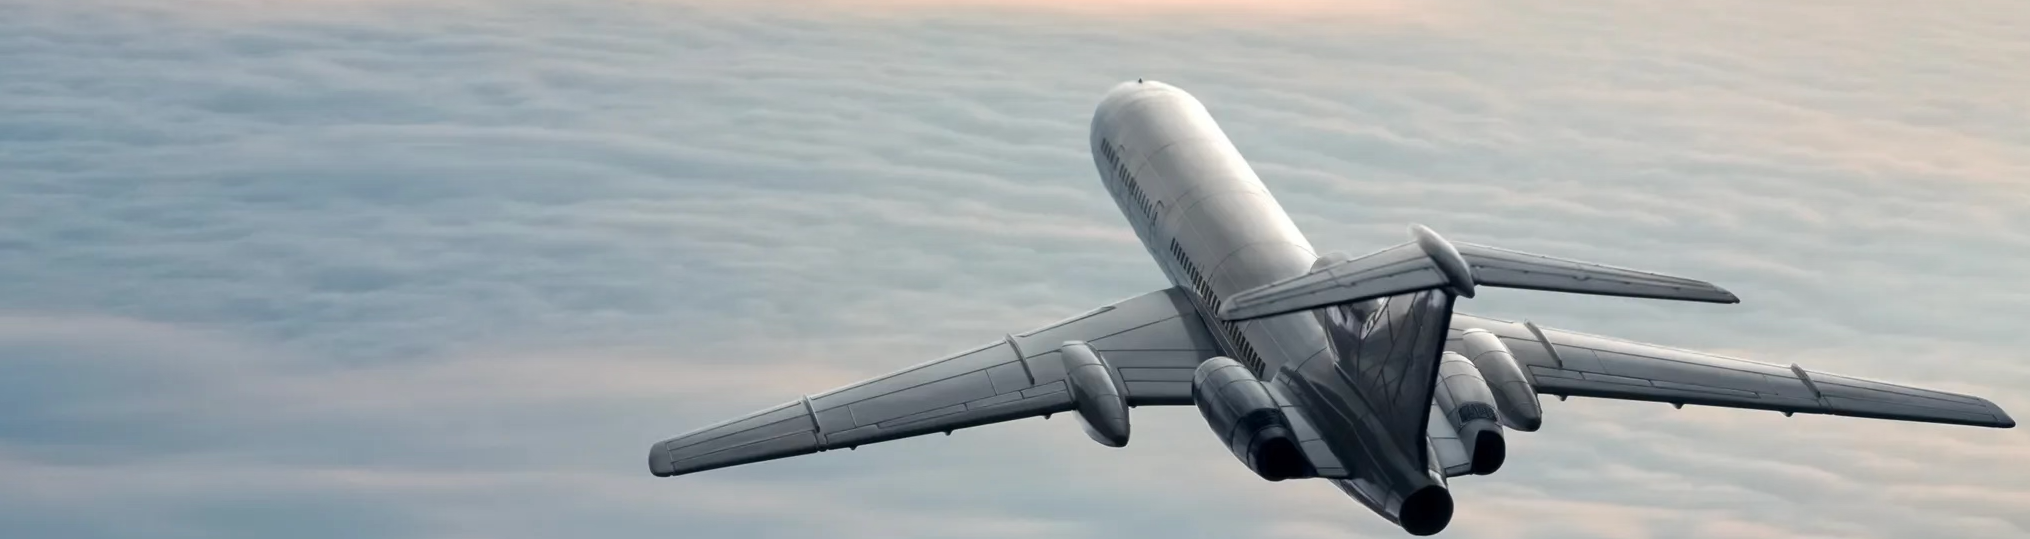

# Aircraft Analysis: Low-risk Aviation Investments

## Overview

This project focuses on finding low-risk Aviation aircraft. Investment companies can use this information to determine which aircraft makes and models would be the safest (ie, most profitable) to invest in.

The main approach here will be cleaning our dataset to remove irrelevant information, then manipulate it to uncover relational trends that we can use to gain insight into what factors contribute to accidents.

## Business Problem

Descriptive analysis of this dataset shows that certain makes, models, and types of aircraft appear to be significantly less likely to be involved in an accident than others. Choosing aircraft with one or two engines or those from overall safer companies such as Cessna, Piper, and Beech will allow investors to face significantly reduced risk.

## Data Understanding

We will be using the publicly available [Aviation Accident Data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the United States [National Transport Safety Board](https://www.ntsb.gov/Pages/monthly.aspx). It contains very detailed information about each occurence, including flight information, weather, purpose of flight, and time of day. We will be focusing on eliminating the 'human element' and less predicatable information from the dataset wherever possible. This approach will enable investors to make informed decisions about what they are investing in. We cannot predict the weather next month or if a flight will need to be made at night or in low visibilty, so this information will be less helpful when considering long-term profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load our dataset
#Columns 6, 7, and 28 have mixed data types so we will treat them as strings
columns_to_object = [6, 7, 28]
df = pd.read_csv('data/Aviation_Data.csv', dtype={col: 'str' for col in columns_to_object})

#set max columns to none to see information on each column 
pd.set_option('display.max_columns', None)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Our dataset contains an impressive amount of individual entries and information on flights dating back to 1948. 

As we are primarily concerned with the objective safety of each make and model, we can begin data cleaning and investigation as to which aspects will not be useful for this.

## Data Preparation

### Data Cleaning

In [4]:
#normalize column names for ease of use
df.columns = df.columns.str.lower().str.replace('.', '_')
df['make'].replace('Air Tractor', 'Air Tractor Inc', inplace=True)

At a glance, certain columns will not be useful for our analysis and we can drop them now. Others will need to be looked at further before we make our judgment.

In [5]:
#drop obvious unnecessary columns
df.drop(columns = ['latitude', 'longitude', 'event_id'], inplace=True)

In [6]:
#Examine Broad Phase of Flight
print(df['broad_phase_of_flight'].value_counts())
print('broad phase null counts:', df['broad_phase_of_flight'].isnull().sum())


broad_phase_of_flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64
broad phase null counts: 28624


In [7]:
df.drop(columns = ['broad_phase_of_flight'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      90348 non-null  object 
 1   accident_number         88889 non-null  object 
 2   event_date              88889 non-null  object 
 3   location                88837 non-null  object 
 4   country                 88663 non-null  object 
 5   airport_code            50132 non-null  object 
 6   airport_name            52704 non-null  object 
 7   injury_severity         87889 non-null  object 
 8   aircraft_damage         85695 non-null  object 
 9   aircraft_category       32287 non-null  object 
 10  registration_number     87507 non-null  object 
 11  make                    88826 non-null  object 
 12  model                   88797 non-null  object 
 13  amateur_built           88787 non-null  object 
 14  number_of_engines       82805 non-null

Broad Phase of Flight could be interesting to consider further but unfortunately it is missing far too many values to be useful in our analysis.

Additionally, investing in a non-professionally made aircraft is undoubtedly a risky and unpredicatable investment. We should only consider accident data for professionally made aircraft. We will have to also drop the rows where it is unknown as we cannot confirm it was not amateur built:

In [8]:
#Remove All Non-Accident Investigation Type Rows, and all amateur built aircraft
df = df[df['investigation_type'] == 'Accident']
df = df[df['amateur_built'] == 'No']
df.drop(columns = ['investigation_type', 'accident_number', 'airport_code', 'airport_name', 'aircraft_category','registration_number', 
                   'amateur_built', 'far_description', 'schedule', 'purpose_of_flight', 'air_carrier', 'publication_date'], inplace=True)

### Data Engineering

It will be helpful to create a few of our own columns for analysis.

In [9]:
df['total_injuries'] = df['total_fatal_injuries'] + df['total_serious_injuries'] + df['total_minor_injuries']
df['total_non_fatal_injuries'] = df['total_serious_injuries'] + df['total_minor_injuries']
df

,event_date,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,total_injuries,total_non_fatal_injuries
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Probable Cause,2.0,0.0
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Probable Cause,4.0,0.0
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause,NaN,NaN
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,2.0,0.0
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
90345,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN,0.0,0.0
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


We need to ensure the date column is properly formatted for all 76,520 remaining rows. We can do this by writing a simple for loop to ensure all of the values can be converted to standard Pandas datetime. If this code does not return an error, we won't have to worry.

In [10]:
def check_date_format(date):
    try:
        pd.to_datetime(date)
        return True
    except ValueError:
        return False

# Check if all dates in the column are properly formatted
all_dates_valid = df['event_date'].map(check_date_format).all()

if all_dates_valid:
    print("All dates are properly formatted.")
else:
    print("Some dates have formatting issues.")

All dates are properly formatted.


In [11]:
#create a new column of make + model
df['make_model'] = df['make'] + '_' + df['model']

#Format 'make' column and describe its properties
df['make'] = df['make'].str.title()
df['make'].describe()

count      76500
unique      1880
top       Cessna
freq       26695
Name: make, dtype: object

As we can see, there are 1880 different Makes, and many appear only once. This isn't very helpful in looking for data trends, so let's create a histogram with the top 30 most frequently occurring makes in our dataset:

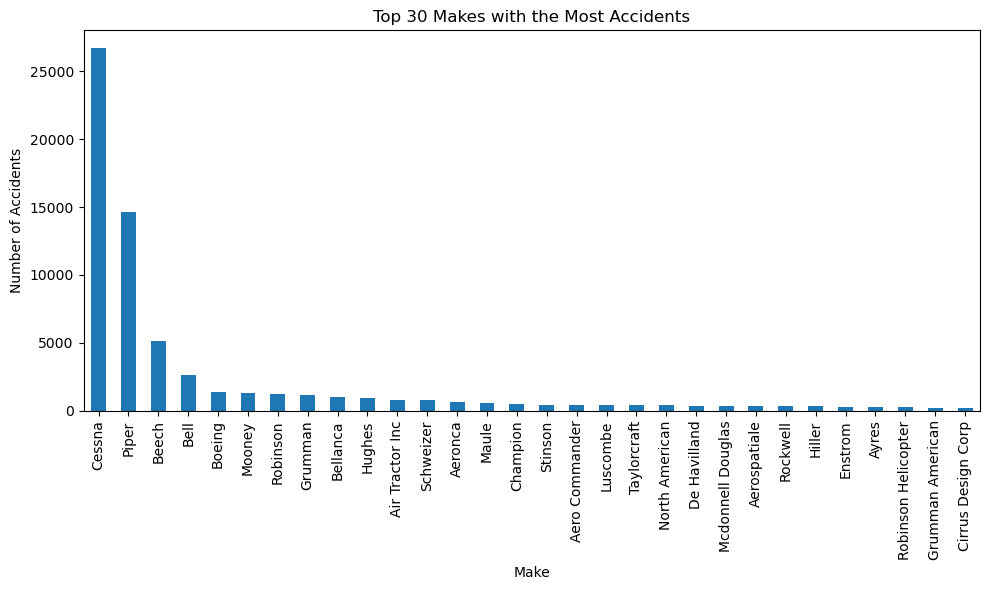

In [12]:
#Create a variable to store the top 30 most frequently occurring makes:
top_30_makes = df['make'].value_counts().nlargest(30)

# Plotting the histogram for top 30 makes
plt.figure(figsize=(10, 6))
top_30_makes.plot(kind='bar')
plt.title('Top 30 Makes with the Most Accidents')
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Cessna has the most accidents by a wide margin, but we will need additional and deeper analysis in order to make assessments on this.

In [13]:
#analyze frequency
df['year'] = pd.to_datetime(df['event_date']).dt.year
accidents_since_2000 = df[df['year'] >= 2000]
accidents_since_2000

,event_date,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,total_injuries,total_non_fatal_injuries,make_model,year
47675,2000-01-01,"HOMESTEAD, FL",United States,Non-Fatal,Substantial,Cessna,550,2.0,Turbo Fan,0.0,0.0,0.0,3.0,VMC,Probable Cause,0.0,0.0,Cessna_550,2000
47676,2000-01-01,"MONTEAGLE, TN",United States,Fatal(2),Destroyed,Bellanca,BL-17-30A,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,2.0,0.0,Bellanca_BL-17-30A,2000
47677,2000-01-02,"VICTORVILLE, CA",United States,Non-Fatal,Substantial,Cessna,172G,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Probable Cause,0.0,0.0,Cessna_172G,2000
47678,2000-01-02,"DOS PALOS, CA",United States,Non-Fatal,Substantial,Cessna,172A,1.0,Reciprocating,0.0,0.0,1.0,0.0,VMC,Probable Cause,1.0,1.0,Cessna_172A,2000
47679,2000-01-02,"CORNING, AR",United States,Non-Fatal,Substantial,Piper,PA-46-310P,1.0,Turbo Prop,0.0,0.0,0.0,5.0,VMC,Probable Cause,0.0,0.0,Piper_PA-46-310P,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Piper,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0,PIPER_PA-28-151,2022
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,Bellanca,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,BELLANCA_7ECA,2022
90345,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN,0.0,0.0,AMERICAN CHAMPION AIRCRAFT_8GCBC,2022
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,Cessna,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,CESSNA_210N,2022


We will focus on the 30 most common aircraft makes for our analysis; these are the companies with enough instances to be statistically relevant.

While older planes are still in service, flight safety and security has improved drastically in our post-9/11 world. For this reason it is  worth looking into whether there has been a noticeable decrease in accidents since:

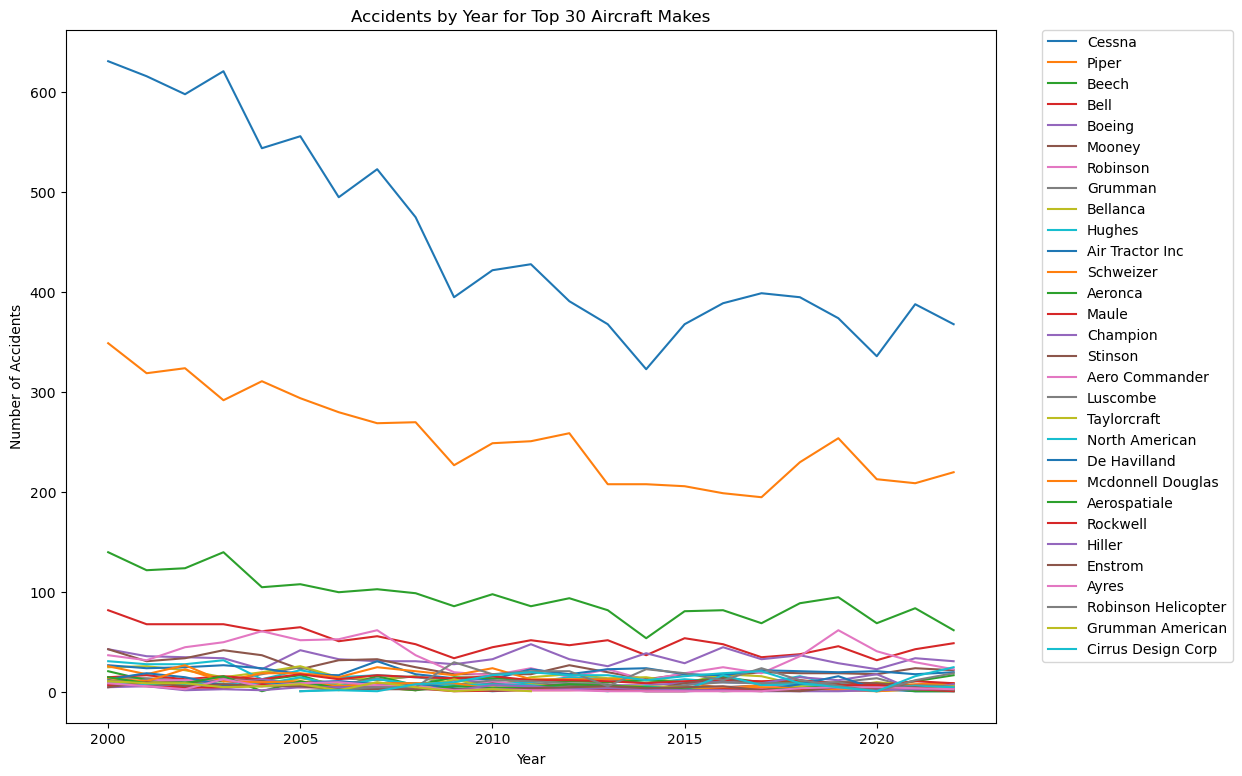

In [14]:
top_30_aircraft = df['make'].value_counts().nlargest(30).index.tolist()

# Filtering DataFrame for 30 most prevalent aircraft makes
df_top_30 = df[df['make'].isin(top_30_aircraft)]

# Grouping data by make and year, and counting occurrences
df_top_30_since_2000 = df[(df['make'].isin(top_30_aircraft)) & (df['year'] >= 2000)]
grouped = df_top_30_since_2000.groupby(['make', 'year']).size().reset_index(name='accidents')

# Creating a line chart for each aircraft make
plt.figure(figsize=(12, 9))

for make in top_30_aircraft:
    make_data = grouped[grouped['make'] == make]
    plt.plot(make_data['year'], make_data['accidents'], label=make)

plt.title('Accidents by Year for Top 30 Aircraft Makes')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

While this provides us with interesting information, it is not the full picture of what is happening. The dataset does not include the amount of planes in service for each company by year, so we don't know the percentage of each company's models that are involved in accidents. Still, it is noteworthy that every aircraft maker is on a downard trend in number of accidents. This implies it is a safer and potentially more profitable to invest in essentially any aircraft company than it was even 15 years ago.

Although we do not have the ability to create an "in-use" aircraft ratio by company, we thankfully have plenty of other useful information in our dataset, and approaches we can take.

The relationship between the number of engines and the total injuries will be instrumental in our analysis. To analyze this, we will create two bar plots:

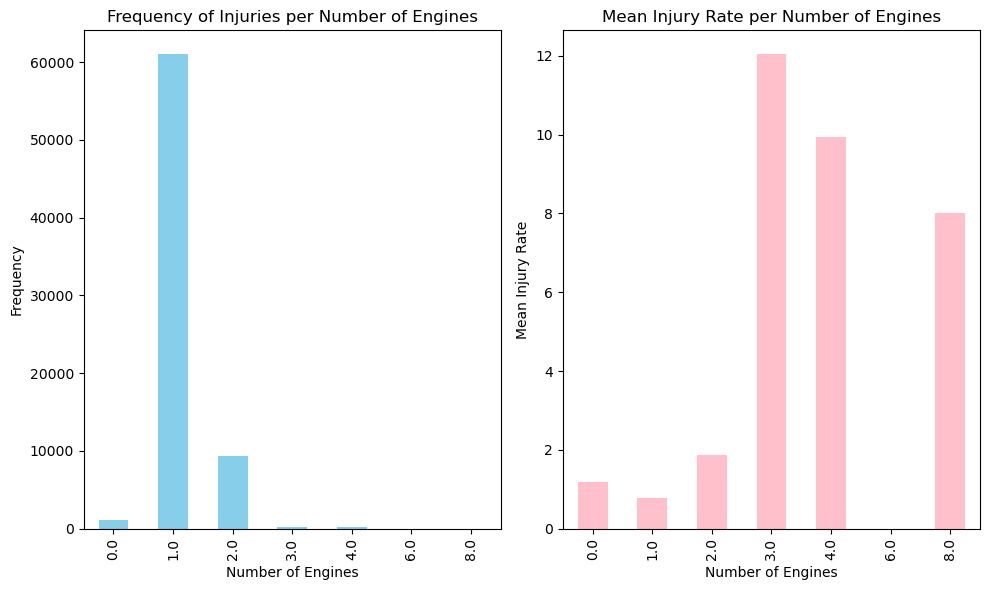

In [15]:
# Calculate frequency of instances for each number of engines
instance_counts = df['number_of_engines'].value_counts().sort_index()

# Calculate mean injury rate for each number of engines
injury_rates = df.groupby('number_of_engines')['total_injuries'].mean().sort_index()

plt.figure(figsize=(10, 6))

# Plot the bar plots side-by-side
plt.subplot(1, 2, 1)
instance_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Injuries per Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
injury_rates.plot(kind='bar', color='pink')
plt.title('Mean Injury Rate per Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Mean Injury Rate')

plt.tight_layout()
plt.show()

The left subplot displays a bar plot showing the frequency of instances for each number of engines, and the right shows a bar plot representing the mean injury rates for the corresponding number of engines.

Using these plots, it is easy to see that injury rates tend to increase as the number of engines does. In other words, aircraft with 1 or 2 engines appear to be the safest.

Notably, single engine aircraft have the second lowest mean injury rate while making up nearly all of the instances in our dataset. We will focus our analysis on these, and determine the safest make/model with one engine:

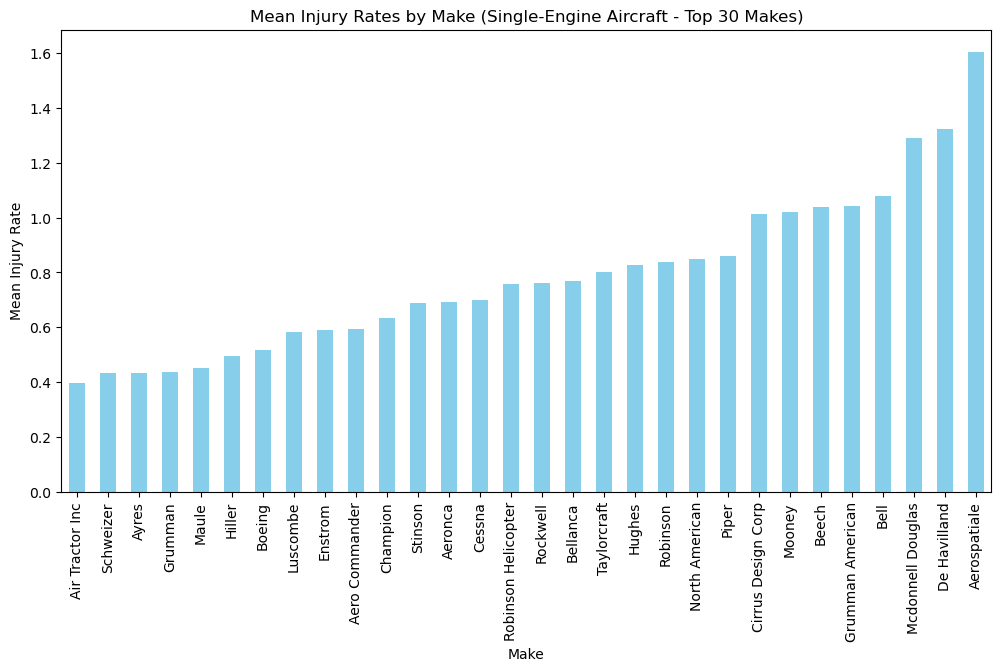

In [16]:
# Filtering df_top_30 for entries where the number of engines is one
df_top_30_single_engine = df_top_30[df_top_30['number_of_engines'] == 1]

# Grouping data by 'make' for single-engine aircraft (top 30 makes) and calculating mean injury rates
make_injury_rates_single_engine = df_top_30_single_engine.groupby('make')['total_injuries'].mean().sort_values()

# Plotting bar plot
make_injury_rates_single_engine.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Mean Injury Rates by Make (Single-Engine Aircraft - Top 30 Makes)')
plt.xlabel('Make')
plt.ylabel('Mean Injury Rate')
plt.xticks(rotation=90)
plt.show()

There are 22 makes with an injury rate below 1.0. This is excellent, as further restricting to these will still give us plenty of options to invest in.

In order to see if there is a single company with the overall best safety rating, we will examine the models in a similar fashion (using the top 30 most common again). In order to do this, we will find each model with an average injury rate less than 1, add each by make, and then plot them:

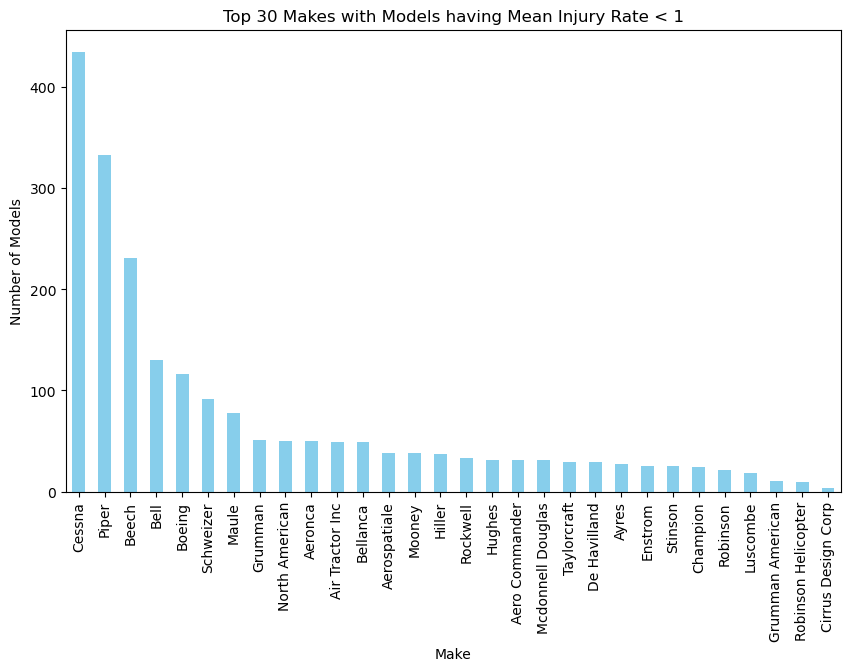

In [17]:
# Create a variable with the top 30 most common makes
top_30_makes = df['make'].value_counts().nlargest(30).index.tolist()

# Filter the DataFrame for the top 30 makes
df_top_30_makes = df[df['make'].isin(top_30_makes)]

# Calculate the mean injury rate per model for the top 30 makes
mean_injury_rate_per_model_top_30 = df_top_30_makes.groupby(['make', 'model'])['total_injuries'].mean()

# Filter models with a mean injury rate < 1 for the top 30 makes
models_with_mean_injury_lt_1_top_30 = mean_injury_rate_per_model_top_30[mean_injury_rate_per_model_top_30 < 1].reset_index()

# Count the number of models with mean injury rate < 1 for each make among the top 30 makes
models_lt_1_count_per_make_top_30 = models_with_mean_injury_lt_1_top_30.groupby('make')['model'].count().sort_values(ascending=False)

# Plotting the top 30 makes with the count of models having mean injury rate < 1
plt.figure(figsize=(10, 6))
models_lt_1_count_per_make_top_30.plot(kind='bar', color='skyblue')
plt.title('Top 30 Makes with Models having Mean Injury Rate < 1')
plt.xlabel('Make')
plt.ylabel('Number of Models')
plt.xticks(rotation=90)
plt.show()

Cessna has the most models with the the lowest injury rates. Hooray!

### Weather Influence
It will be useful to see if there is a noticeable relationship between poor visibility and accident statistics.

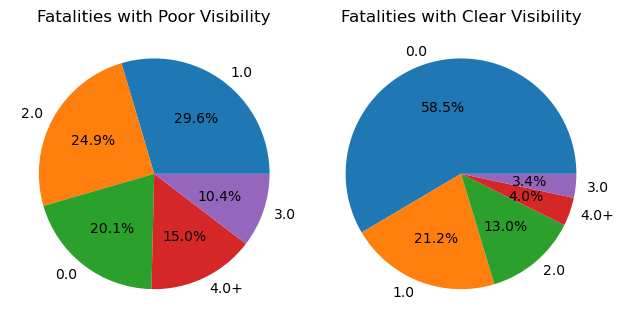

In [18]:
# Filter data for 'IMC' and 'VMC' while dropping null values in 'total_injuries'
imc_data = df[(df['weather_condition'] == 'IMC') & (df['total_injuries'].notnull())].copy()
vmc_data = df[(df['weather_condition'] == 'VMC') & (df['total_injuries'].notnull())].copy()

# Group counts of 4.0 injuries or more as '4+'
imc_data.loc[:, 'total_injuries_grouped'] = imc_data['total_injuries'].apply(lambda x: '4.0+' if x >= 4.0 else str(x))
vmc_data.loc[:, 'total_injuries_grouped'] = vmc_data['total_injuries'].apply(lambda x: '4.0+' if x >= 4.0 else str(x))

# Calculate value counts for 'IMC' and 'VMC' with grouping
imc_counts = imc_data['total_injuries_grouped'].value_counts()
vmc_counts = vmc_data['total_injuries_grouped'].value_counts()

# Convert counts to dictionary for pie chart plotting
imc_counts_dict = imc_counts.to_dict()
vmc_counts_dict = vmc_counts.to_dict()

# Replace count of '4+' if it doesn't exist in 'IMC' or 'VMC' counts
if '4.0+' not in imc_counts_dict:
    imc_counts_dict['4.0+'] = 0
if '4.0+' not in vmc_counts_dict:
    vmc_counts_dict['4.0+'] = 0

# Plot pie chart for 'IMC'
plt.subplot(1, 2, 1)
plt.pie(imc_counts_dict.values(), labels=imc_counts_dict.keys(), autopct='%1.1f%%')
plt.title('Fatalities with Poor Visibility')

# Plot pie chart for 'VMC'
plt.subplot(1, 2, 2)
plt.pie(vmc_counts_dict.values(), labels=vmc_counts_dict.keys(), autopct='%1.1f%%')
plt.title('Fatalities with Clear Visibility')

plt.tight_layout()
plt.show()


It is apparent from these pie charts that aircraft flying in poor visibilty conditions (requiring pilots to rely solely on instruments) leads to a significant increase in casualties. It is highly advised to avoid investing in planes that fly routes that have poor visibilty. 

## Conclusion:

- In terms of overall safety ratings for investing, single engine planes should make up the majority of investments.
- Investing in a single well-known company may be a safe approach to start with. Cessna is a great choice, as our dataset has provided ample information for model choices.
- Avoiding routes with poor visibility and providing further training pilots to deal with adverse conditions would likely aid in reducing accidents and increase profit.

## Future:
- Compare cost of the safest aircraft models to determine which can bring the largest return on investment
- Gathering data on Aircraft sales and in-use data for individual aircraft would allow us to make more informative individual model recommendations